In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def lorentz(q,m,e,b,v,tm,dt):
    # the values for e b and v must be inputted as vectors
    #i.e np arrays
    #time is set to zero and we have an empty vector for r the displacement
    #as we are starting from 0
    
    t = 0
    r = np.array([0,0,0])
   
    #creates a list of all displacements in x y and z directions
    x = [0]
    y = [0]
    z = [0]
    
    while t < tm:
        
        #user inputs a max time and this loop runs for each step until tm is reached
        # calculating force as shown in manual
        f = q*(e + np.cross(v,b))
        
        #shorter formula for acc is just f/ m
        a = f/m
     
        #euler crommer
        v = v + a*dt
        r = r + v*dt
        
        
        #adds each component of the vector to lists x y and z
        x.append(r[0])
        y.append(r[1])
        z.append(r[2])
        
        #t increases by the step size and the loop repeats 
        t += dt
        
        
    #the lists are seen as strings
    #in order to be able to plot each element of the lists must be converted to floats 
    x = [float(i) for i in x]
    y = [float(i) for i in y]
    z = [float(i) for i in z]
    
    #returns x,y and z components of the displacement
    return x,y,z

       

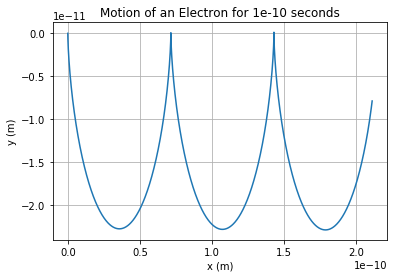

In [19]:
# v_ is the inital vel t_0 is the time period and dt is the step size 
#e and b are the inital cond for mag and e fields
#q is the charge of the particle and m is its mass

#x, y and z are now assigned as variables since function returns 3     
x,y,z = lorentz(-1.6e-19,9.1e-31,np.array([0,2,0]),np.array([0,0,1]),np.array([0,0,0]),1e-10,1e-14)

#plotting 
plt.title ('Motion of an Electron for 1e-10 seconds')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)

#limits


plt.plot(x, y)
plt.show()

    

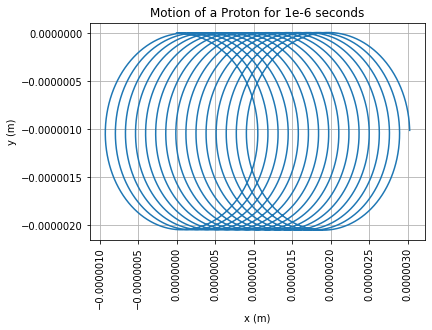

In [15]:
#q1
#e field is set to 2V/m j b field is 1T k and v_0 is 100m/s i
a, b, c = lorentz(1.6e-19,1.67e-27,np.array([0,2,0]),np.array([0,0,1]),np.array([100,0,0]),1e-6,1e-12)

#plotting
plt.title ('Motion of a Proton for 1e-6 seconds')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)


plt.plot(a, b)
plt.xticks(rotation=90)
plt.show()


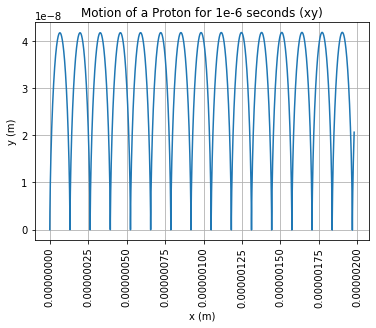

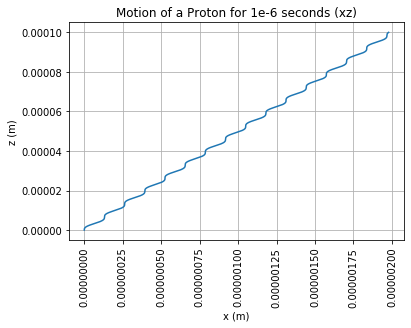

In [16]:

#q2 
#v now 100ms k

a, b, c = lorentz(1.6e-19,1.67e-27,np.array([0,2,0]), np.array([0,0,1]),np.array([0,0,100]),1e-6,1e-12)

# plotting xy plane
plt.title ('Motion of a Proton for 1e-6 seconds (xy)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)


#plotting
plt.plot(a, b)
plt.xticks(rotation=90)
plt.show()


plt.title ('Motion of a Proton for 1e-6 seconds (xz)')
plt.xlabel('x (m)')
plt.ylabel('z (m)')
plt.grid(True)


#plotting
plt.plot(a,c)
plt.xticks(rotation=90)
plt.show()
       

In [13]:
#q3 new code for velocities
def lor_v(q,m,e,b,v,tm,dt):
    t = 0
    r = np.array([0,0,0])
   
    
    #lists are now for the x y z comp of velocity vector
    #dont include 0 this time
    
    x_v = [v[0]]
    y_v = [v[1]]
    z_v = [v[2]]
    
    while t < tm:
        
        f = q*(e + np.cross(v,b))
        

        
        a = f/m
     
        v = v + a*dt
       
        
        x_v.append(v[0])
        y_v.append(v[1])
        z_v.append(v[2])
        
        t += dt
        
        
    
    x_v = [float(i) for i in x_v]
    y_v = [float(i) for i in y_v]
    z_v = [float(i) for i in z_v]
    
    
   
    #returns the comps of the vel vector
    return x_v,y_v,z_v

       

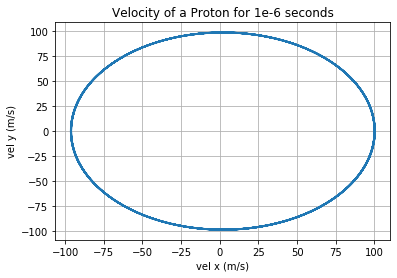

In [22]:
# using new vel lorentz function
vx,vy,vz = lor_v(1.6e-19,1.67e-27,np.array([0,2,0]),np.array([0,0,1]),np.array([100,0,0]),1e-6,1e-12)

#plotting
plt.title ('Velocity of a Proton for 1e-6 seconds')
plt.xlabel('vel x (m/s)')
plt.ylabel('vel y (m/s)')

plt.grid(True)

plt.plot(vx, vy)
plt.show()


In [19]:

#new function for cyclotron - easier than inputting vectors into formula for tm in the org function
#the user no longer inputs tm but the max t is now given by this formula
# assuming the b field is always in z dir hence b[2]
    
def lorentz_c(q,m,e,b,v,dt):
    t = 0
    r = np.array([0,0,0])
   
    #creates a list of all displacements in x y and z directions
    x = [0]
    y = [0]
    z = [0]
    
    T = 2*np.pi*m/(q*b[2])
    
    while t <T:
        
        f = q*(e + np.cross(v,b))
        

        
        a = f/m
     
        v = v + a*dt
        r = r + v*dt
        
        x.append(r[0])
        y.append(r[1])
        z.append(r[2])
        
        t += dt
        
        
    
    x = [float(i) for i in x]
    y = [float(i) for i in y]
    z = [float(i) for i in z]
    
    return x,y,z

       

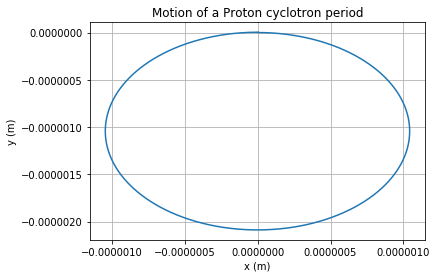

In [14]:
#no e field in this case 
x1,y1,z1 = lorentz_c(1.6e-19,1.67e-27,np.array([0,0,0]),np.array([0,0,1]),np.array([100,0,0]),1e-11)

#plotting
plt.title ('Motion of a Proton cyclotron period')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)

plt.plot(x1, y1)
plt.show()

#when the velocity is in the x direction and there is no e field the proton displays circluar motion as expected


In [3]:

def lorentz_b(q,m,e,v,tm,dt):
    t = 0
    r = np.array([0,0,0])
    b = 0
    
   
    x = [0]
    y = [0]
    z = [0]
    
    
    while t <tm:
        
        f = q*(e + np.cross(v,np.array([0,0,b])))

        
        a = f/m
     
        v = v + a*dt
        r = r + v*dt
        
        x.append(r[0])
        y.append(r[1])
        z.append(r[2])
        
    
        t += dt
        b = (np.abs(r[0])*(1e+11))
        
       
    x = [float(i) for i in x]
    y = [float(i) for i in y]
    z = [float(i) for i in z]
    
    return x,y,z

       

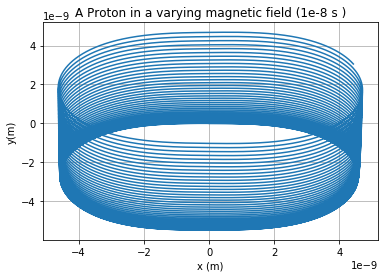

In [18]:
xb,yb,zb = lorentz_b(1.6e-19,1.67e-27,np.array([0,2,0]),np.array([100,0,0]),1e-8, 1e-14)

plt.title ('A Proton in a varying magnetic field (1e-8 s )')
plt.xlabel('x (m)')
plt.ylabel('y(m)')
plt.grid(True)
#plotting
plt.plot(xb, yb)
plt.show()

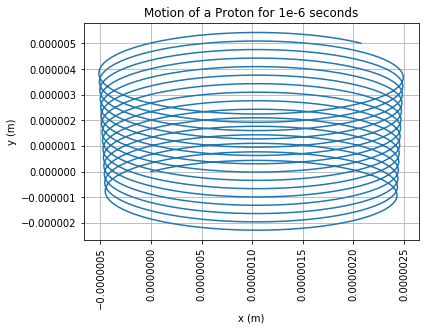

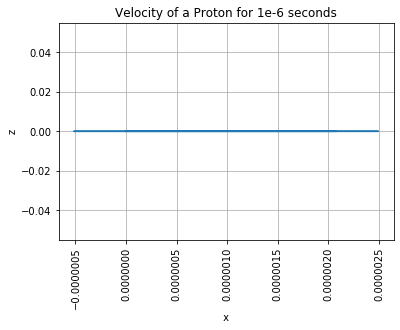

In [17]:
#proton new conditions

a1, b1, c1 = lorentz(1.6e-19,1.67e-27,np.array([-5,0,0]),np.array([0,0,1]),np.array([100,100,0]),1e-6,1e-11)


plt.title ('Motion of a Proton for 1e-6 seconds')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)


#plotting
plt.plot(a1, b1)
plt.xticks(rotation=90)
plt.show()

plt.title ('Velocity of a Proton for 1e-6 seconds')
plt.xlabel(' x ')
plt.ylabel('z')
plt.grid(True)

plt.plot(a1, c1)
plt.xticks(rotation=90)
plt.show()


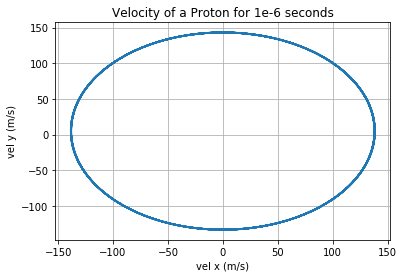

In [23]:
vx1,vy1,vz1 = lor_v(1.6e-19,1.67e-27,np.array([-5,0,0]),np.array([0,0,1]),np.array([100,100,0]),1e-6,1e-12)

plt.title ('Velocity of a Proton for 1e-6 seconds')
plt.xlabel('vel x (m/s)')
plt.ylabel('vel y (m/s)')
plt.grid(True)


#plotting
plt.plot(vx1, vy1)

plt.show()



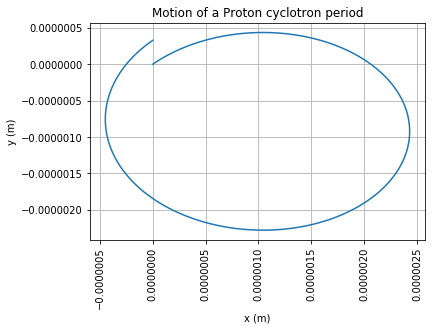

In [20]:
x_c,y_c,z_c = lorentz_c(1.6e-19,1.67e-27,np.array([-5,0,0]),np.array([0,0,1]),np.array([100,100,0]),1e-12)

plt.title ('Motion of a Proton cyclotron period')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)
#plotting
plt.plot(x_c, y_c)

plt.xticks(rotation=90)
plt.show()

#when the velocity is in the x direction and there is no e field the proton displays circluar motion as expected


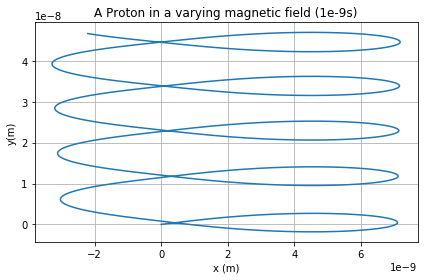

In [7]:
xb1,yb1,zb1 = lorentz_b(1.6e-19,1.67e-27,np.array([-5,0,0]),np.array([100,100,0]),1e-9, 1e-13)

plt.title ('A Proton in a varying magnetic field (1e-9s)')
plt.xlabel('x (m)')
plt.ylabel('y(m)')
plt.grid(True)
#plotting

plt.plot(xb1, yb1)
plt.tight_layout()
plt.show()

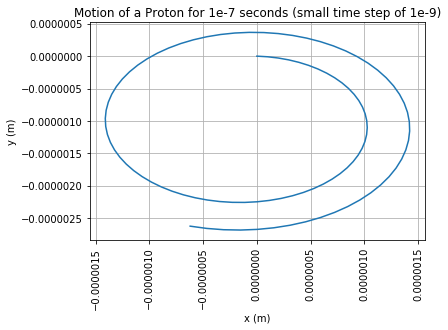

In [21]:
#testing the code in the presence of a magnetic field only
#now with the time step being too large 

a3, b3, c3 = lorentz(1.6e-19,1.67e-27,np.array([0,0,0]),np.array([0,0,1]),np.array([100,0,0]),1e-7,1e-9)


plt.title ('Motion of a Proton for 1e-7 seconds (small time step of 1e-9)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)


#plotting
plt.plot(a3, b3)
plt.xticks(rotation=90)
plt.show()

plt.show()

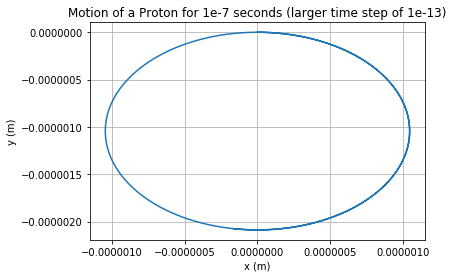

In [11]:
#testing the code in the presence of a magnetic field only
#now with the time step being smaller

a3, b3, c3 = lorentz(1.6e-19,1.67e-27,np.array([0,0,0]),np.array([0,0,1]),np.array([100,0,0]),1e-7,1e-13)


plt.title ('Motion of a Proton for 1e-7 seconds (larger time step of 1e-13)')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.grid(True)


#plotting
plt.plot(a3, b3)
plt.show()

plt.show()